# Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix


 # Loading and Exploring the Data

In [2]:
titanic_data =pd.read_csv('tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

In [5]:
# Drop unnecessary columns
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)



In [6]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.840500
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,27.0,0,0,8.0500,S


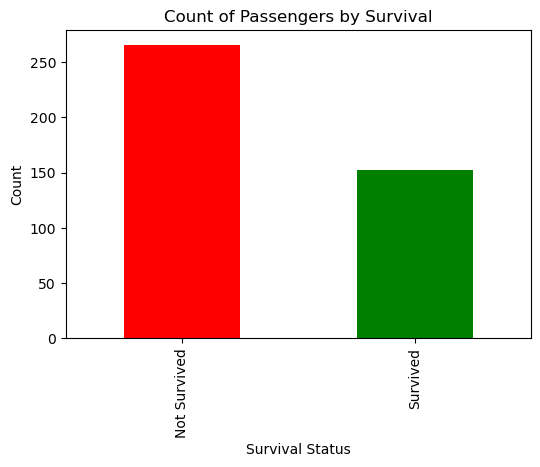

In [8]:
plt.figure(figsize=(6, 4))
titanic_data['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Count of Passengers by Survival')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

<Figure size 600x400 with 0 Axes>

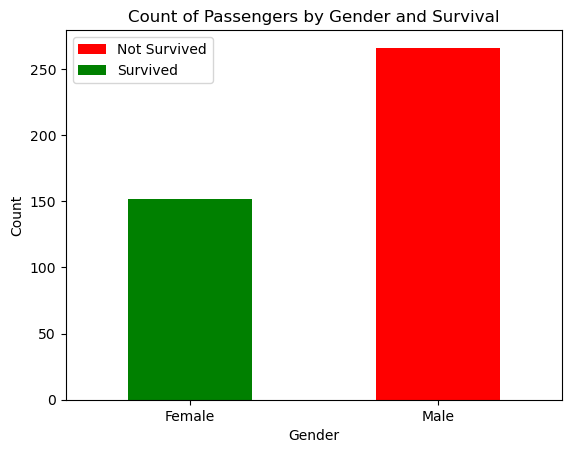

In [9]:
plt.figure(figsize=(6, 4))
titanic_data.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Count of Passengers by Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.show()

<Figure size 600x400 with 0 Axes>

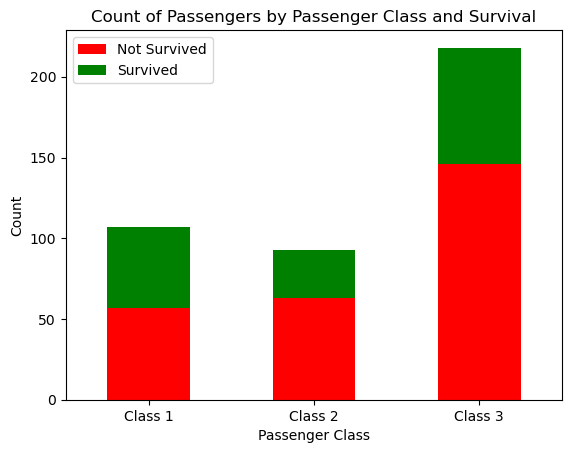

In [10]:
plt.figure(figsize=(6, 4))
titanic_data.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Count of Passengers by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.show()

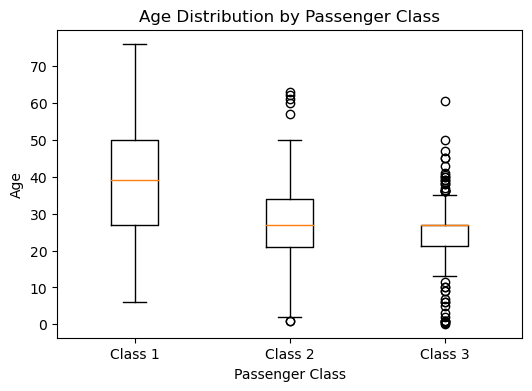

In [11]:
plt.figure(figsize=(6, 4))
plt.boxplot([titanic_data[titanic_data['Pclass'] == 1]['Age'].dropna(),
             titanic_data[titanic_data['Pclass'] == 2]['Age'].dropna(),
             titanic_data[titanic_data['Pclass'] == 3]['Age'].dropna()])
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.xticks([1, 2, 3], ['Class 1', 'Class 2', 'Class 3'])
plt.show()

# Data Preprocessing

In [12]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'], drop_first=True)

In [13]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

In [14]:
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,27.0,0,0,8.0500,1,0,1
414,1,1,39.0,0,0,108.9000,0,0,0
415,0,3,38.5,0,0,7.2500,1,0,1
416,0,3,27.0,0,0,8.0500,1,0,1


#  Split the Data into Training and Testing Sets

In [15]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [17]:
# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Perform k-fold cross-validation ( k=5)
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [20]:
k = 8
X_new = SelectKBest(chi2, k=k).fit_transform(X, y)
model.fit(X_new, y)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)
print("Prediction results:", y_pred)

Prediction results: [0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


E:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Evaluate the model's performance

In [22]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)


Accuracy: 100.0


In [23]:
classification_report_str = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(classification_report_str).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     50.0
1                   1.0     1.0       1.0     34.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     84.0
weighted avg        1.0     1.0       1.0     84.0


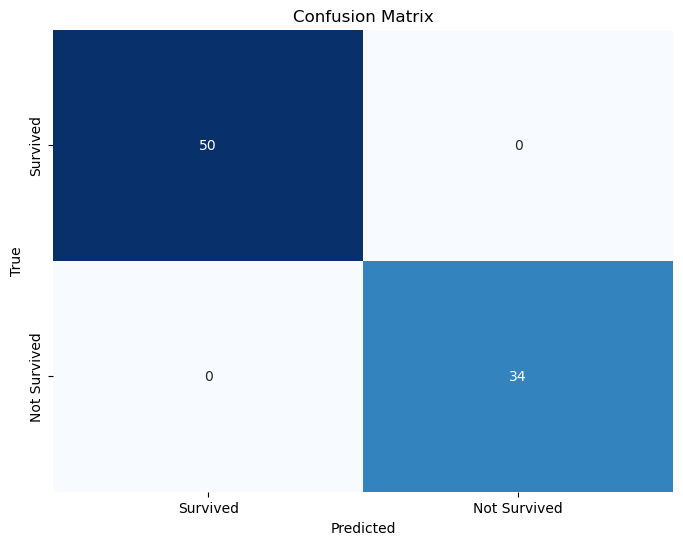

In [24]:
confusion_matrix_result = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
class_names = ["Survived", "Not Survived"]
tick_marks = [0.5 + i for i in range(len(class_names))]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()